# Vaccine dataset

The Sustainable Development Goals (SDGs) are a global agenda adopted by the United Nations in 2015. It aims to achieve global sustainable development by 2030. The third of these aims is to ensure healthy lifestyles and promote well-being at all ages. The goal of this data analysis will be data mining and analysis for covid-19, which has been circulating the world for the past three years.
COVID-19 cases were initially concentrated in China. However, as the pandemic unfolded, the virus began to spread globally. Countries around the world have successively reported COVID-19 cases. The epidemic has spread to almost all countries and regions, becoming a global public health crisis. The coronavirus has had a dramatic health impact on people of all ages. The clinical presentation of covid-19 infection ranges from mild cold-like symptoms to severe respiratory illness, possibly leading to death. Especially for the elderly and those with chronic conditions, the virus's spread is more dangerous. Covid- has put massive pressure on national health systems to cope with many patients and cases. In addition, it significantly impacts the social economy of all countries in the world.
Director-General Tedros Adhanom Ghebreyesus said today at a press conference in Geneva that he accepted the recommendations of the 15th meeting of the Emergency Committee for COVID-19 under the International Health Regulations 2005 (Radio New Zealand, 2023). It then declared the pandemic no longer a public health emergency of international concern. However, he stressed that does not mean the virus is no longer a global health threat (Radio New Zealand, 2023).
Therefore, based on the above description, we need to understand the potential threat of COVID-19 to human beings through a large amount of data. This data analysis aims to analyze the existing and potential risks of COVID-19 and the effectiveness of the COVID-19 vaccine against the virus through data collection, mining, and analysis.




## 2. Data Understanding

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 2.3 Vaccination Data Set

data_Vaccination = pd.read_csv('/home/ubuntu/vaccination-data.csv', index_col=False)

data_Vaccination.head(10)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,American Samoa,ASM,WPRO,REPORTING,2023-03-29,114706.0,46206,207.812,83.711,42479,76.959,NaN,2020-12-21,3.0,24160.0,43.770
1,Austria,AUT,EURO,REPORTING,2023-06-11,20402999.0,6899834,229.200,76.953,6682310,74.422,NaN,2020-12-30,10.0,5405808.0,60.205
2,Bangladesh,BGD,SEARO,REPORTING,2023-06-25,360177584.0,151379833,218.701,91.918,141208849,85.743,NaN,2021-01-27,8.0,67588902.0,41.040
3,Brunei Darussalam,BRN,WPRO,REPORTING,2023-06-30,1293100.0,451149,295.580,103.125,446714,102.111,NaN,2021-04-03,5.0,340466.0,77.825
4,Bulgaria,BGR,EURO,REPORTING,2023-06-11,4618004.0,2108377,66.400,30.829,2080169,30.417,NaN,2020-12-30,4.0,832572.0,12.174
5,Central African Republic,CAF,AFRO,REPORTING,2023-07-16,3182417.0,2600389,65.892,53.841,2484985,51.451,NaN,2021-03-19,2.0,366221.0,7.583
6,Cuba,CUB,AMRO,REPORTING,2023-06-02,38105906.0,10749013,336.428,94.900,10016328,88.432,NaN,NaN,3.0,8742146.0,77.182
7,Curaçao,CUW,AMRO,REPORTING,2023-06-02,260324.0,108601,158.644,66.183,100885,61.480,NaN,2021-02-24,3.0,43138.0,26.289
8,Ecuador,ECU,AMRO,REPORTING,2023-02-24,39495110.0,15329151,223.856,86.885,14233323,80.674,NaN,2021-01-20,4.0,7708466.0,43.691
9,Estonia,EST,EURO,REPORTING,2023-06-11,2204676.0,845120,165.900,63.457,842153,63.234,NaN,2020-12-23,9.0,487291.0,36.589


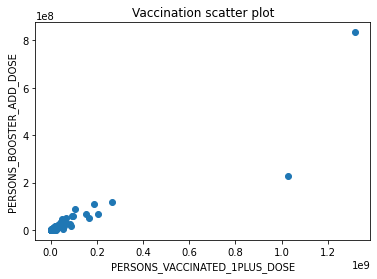

In [4]:
# Defines the columns to be used in the scatter plot
x_column = 'PERSONS_VACCINATED_1PLUS_DOSE'
y_column = 'PERSONS_BOOSTER_ADD_DOSE'

# Create a scatter plot
plt.scatter(data_Vaccination['PERSONS_VACCINATED_1PLUS_DOSE'], data_Vaccination['PERSONS_BOOSTER_ADD_DOSE'])

# Set the chart title and label
plt.title('Vaccination scatter plot')
plt.xlabel(x_column)
plt.ylabel(y_column)

# show grapher
plt.show()

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('customers').getOrCreate()
from pyspark.ml.clustering import KMeans
# Loads data.
dataset_vaccination = spark.read.csv("/home/ubuntu/vaccination-data.csv",header=True,inferSchema=True)
dataset_vaccination.printSchema()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 08:02:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- DATE_UPDATED: string (nullable = true)
 |-- TOTAL_VACCINATIONS: long (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- VACCINES_USED: string (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)



## 3. Data Prepatation

### 3.1 Data Quality

In [6]:
# Use Spark to read in the Ecommerce Customers csv file.
dataset_vaccination.describe().show()

+-------+--------------------+----+----------+-----------+------------+--------------------+-----------------------------+-------------------------+------------------------------------+--------------------+------------------------+-------------+------------------+--------------------------+------------------------+-------------------------------+
|summary|             COUNTRY|ISO3|WHO_REGION|DATA_SOURCE|DATE_UPDATED|  TOTAL_VACCINATIONS|PERSONS_VACCINATED_1PLUS_DOSE|TOTAL_VACCINATIONS_PER100|PERSONS_VACCINATED_1PLUS_DOSE_PER100|   PERSONS_LAST_DOSE|PERSONS_LAST_DOSE_PER100|VACCINES_USED|FIRST_VACCINE_DATE|NUMBER_VACCINES_TYPES_USED|PERSONS_BOOSTER_ADD_DOSE|PERSONS_BOOSTER_ADD_DOSE_PER100|
+-------+--------------------+----+----------+-----------+------------+--------------------+-----------------------------+-------------------------+------------------------------------+--------------------+------------------------+-------------+------------------+--------------------------+-----------

In [7]:
from pyspark.sql.functions import col, sum

dataset_vaccination.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in dataset_vaccination.columns]).show()

+-------+----+----------+-----------+------------+------------------+-----------------------------+-------------------------+------------------------------------+-----------------+------------------------+-------------+------------------+--------------------------+------------------------+-------------------------------+
|COUNTRY|ISO3|WHO_REGION|DATA_SOURCE|DATE_UPDATED|TOTAL_VACCINATIONS|PERSONS_VACCINATED_1PLUS_DOSE|TOTAL_VACCINATIONS_PER100|PERSONS_VACCINATED_1PLUS_DOSE_PER100|PERSONS_LAST_DOSE|PERSONS_LAST_DOSE_PER100|VACCINES_USED|FIRST_VACCINE_DATE|NUMBER_VACCINES_TYPES_USED|PERSONS_BOOSTER_ADD_DOSE|PERSONS_BOOSTER_ADD_DOSE_PER100|
+-------+----+----------+-----------+------------+------------------+-----------------------------+-------------------------+------------------------------------+-----------------+------------------------+-------------+------------------+--------------------------+------------------------+-------------------------------+
|      0|   0|         0|      

### 3.3 Construct the Data 

In [8]:
from pyspark.sql.functions import when

dataset_vaccination = dataset_vaccination.withColumn(
    "The prevalence of vaccines",
    when(dataset_vaccination["TOTAL_VACCINATIONS_PER100"] / 100 >= 3, "High")
    .when(dataset_vaccination["TOTAL_VACCINATIONS_PER100"] < 2, "Low")
    .otherwise("Medium")
)
dataset_vaccination.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- DATE_UPDATED: string (nullable = true)
 |-- TOTAL_VACCINATIONS: long (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- VACCINES_USED: string (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)



In [9]:
from pyspark.sql.functions import when

dataset_vaccination = dataset_vaccination.withColumn(
    "Percentage of more than two doses",
    when(dataset_vaccination["TOTAL_VACCINATIONS"] != 0, dataset_vaccination["PERSONS_VACCINATED_1PLUS_DOSE"] / dataset_vaccination["TOTAL_VACCINATIONS"])
    .otherwise(0)
)
dataset_vaccination.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- DATE_UPDATED: string (nullable = true)
 |-- TOTAL_VACCINATIONS: long (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- VACCINES_USED: string (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)
 |-- Percentage of more than two doses: double (nullable = true)



### 3.4 Intergrating the data

In [13]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RenameColumn").getOrCreate()

df_spark = spark.read.csv("/home/ubuntu/WHO-COVID-19-global-table-data.csv",inferSchema=True,header=True)
df_renamed = df_spark.withColumnRenamed("Name", "COUNTRY")
df_vaccination_joined = dataset_vaccination.join(df_renamed, 'COUNTRY', 'inner')  # Other options: 'outer', 'left_outer', 'right_outer', 'cross'

df_vaccination_joined.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- DATE_UPDATED: string (nullable = true)
 |-- TOTAL_VACCINATIONS: long (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- VACCINES_USED: string (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)
 |-- Percentage of more than two doses: double (nullable = true)
 |-- WHO Region: string (nullable = true)
 |-- Cases

In [14]:
df_vaccination_joined.drop("END_DATE", "COMMENT")

DataFrame[COUNTRY: string, ISO3: string, WHO_REGION: string, DATA_SOURCE: string, DATE_UPDATED: string, TOTAL_VACCINATIONS: bigint, PERSONS_VACCINATED_1PLUS_DOSE: int, TOTAL_VACCINATIONS_PER100: double, PERSONS_VACCINATED_1PLUS_DOSE_PER100: double, PERSONS_LAST_DOSE: int, PERSONS_LAST_DOSE_PER100: double, VACCINES_USED: string, FIRST_VACCINE_DATE: string, NUMBER_VACCINES_TYPES_USED: int, PERSONS_BOOSTER_ADD_DOSE: int, PERSONS_BOOSTER_ADD_DOSE_PER100: double, The prevalence of vaccines: string, Percentage of more than two doses: double, WHO Region: string, Cases - cumulative total: int, Cases - cumulative total per 100000 population: double, Cases - newly reported in last 7 days: int, Cases - newly reported in last 7 days per 100000 population: double, Cases - newly reported in last 24 hours: int, Deaths - cumulative total: int, Deaths - cumulative total per 100000 population: double, Deaths - newly reported in last 7 days: int, Deaths - newly reported in last 7 days per 100000 populati

### 3.5 Reformatting the data

In [15]:
Western_Pacific_data = df_vaccination_joined.where(df_vaccination_joined['WHO Region'] == 'Western Pacific')
Western_Pacific_data.head(3)

[Row(COUNTRY='American Samoa', ISO3='ASM', WHO_REGION='WPRO', DATA_SOURCE='REPORTING', DATE_UPDATED='2023-03-29', TOTAL_VACCINATIONS=114706, PERSONS_VACCINATED_1PLUS_DOSE=46206, TOTAL_VACCINATIONS_PER100=207.812, PERSONS_VACCINATED_1PLUS_DOSE_PER100=83.711, PERSONS_LAST_DOSE=42479, PERSONS_LAST_DOSE_PER100=76.959, VACCINES_USED=None, FIRST_VACCINE_DATE='2020-12-21', NUMBER_VACCINES_TYPES_USED=3, PERSONS_BOOSTER_ADD_DOSE=24160, PERSONS_BOOSTER_ADD_DOSE_PER100=43.77, The prevalence of vaccines='Medium', Percentage of more than two doses=0.40282112531166636, WHO Region='Western Pacific', Cases - cumulative total=8341, Cases - cumulative total per 100000 population=15111.329, Cases - newly reported in last 7 days=0, Cases - newly reported in last 7 days per 100000 population=0.0, Cases - newly reported in last 24 hours=0, Deaths - cumulative total=34, Deaths - cumulative total per 100000 population=61.598, Deaths - newly reported in last 7 days=0, Deaths - newly reported in last 7 days per

## 4. Data Transformation

### 4.1 Data Reducing

In [16]:
numeric_columns = [name for name, dtype in Western_Pacific_data.dtypes if dtype in ["int", "double"]]
data_Importance = Western_Pacific_data.select(numeric_columns)

correlation_matrix = {}
for column_name in numeric_columns:
    if column_name != "Recovery_Rate":  # We don't want to correlate a column with itself
        correlation_value = data_Importance.stat.corr(column_name, "Percentage of more than two doses")
        correlation_matrix[column_name] = correlation_value

# Now, correlation_matrix holds correlations of each column with "Recovery_Rate"
print(correlation_matrix)


{'PERSONS_VACCINATED_1PLUS_DOSE': -0.09712816215938701, 'TOTAL_VACCINATIONS_PER100': -0.806397519207829, 'PERSONS_VACCINATED_1PLUS_DOSE_PER100': -0.6862104715491444, 'PERSONS_LAST_DOSE': -0.09734760801001678, 'PERSONS_LAST_DOSE_PER100': -0.7277663200803108, 'NUMBER_VACCINES_TYPES_USED': -0.008137410764351002, 'PERSONS_BOOSTER_ADD_DOSE': -0.10925714101512309, 'PERSONS_BOOSTER_ADD_DOSE_PER100': -0.8155325130127589, 'Percentage of more than two doses': 1.0, 'Cases - cumulative total': -0.2338739671872325, 'Cases - cumulative total per 100000 population': -0.4957655617240335, 'Cases - newly reported in last 7 days': -0.17520006032925167, 'Cases - newly reported in last 7 days per 100000 population': -0.21658037013678275, 'Cases - newly reported in last 24 hours': nan, 'Deaths - cumulative total': -0.2582647042304903, 'Deaths - cumulative total per 100000 population': -0.14764755073477875, 'Deaths - newly reported in last 7 days': nan, 'Deaths - newly reported in last 7 days per 100000 popu

In [17]:
columns_to_drop = ['VACCINES_USED', 'DATE_UPDATED']
Western_Pacific_data = Western_Pacific_data.drop(*columns_to_drop)
Western_Pacific_data.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- TOTAL_VACCINATIONS: long (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)
 |-- Percentage of more than two doses: double (nullable = true)
 |-- WHO Region: string (nullable = true)
 |-- Cases - cumulative total: integer (nullable = true)
 |-- Cases - cumulative total per 100000 p

## 5. DM Method

#### Identify the Data Mining method
#### Describe how it aligns with the objectives

## 6. Data Mining Algorithms Selection

#### K-Means Clustering with Pyspark

/tmp/ipykernel_1289/1529086809.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Columns in the merged world DataFrame: Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'TOTAL_VACCINATIONS',
       'PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100',
       'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE',
       'PERSONS_LAST_DOSE_PER100', 'FIRST_VACCINE_DATE',
       'NUMBER_VACCINES_TYPES_USED', 'PERSONS_BOOSTER_ADD_DOSE',
       'PERSONS_BOOSTER_ADD_DOSE_PER100', 'The prevalence of vaccines',
       'Percentage of more than two doses', 'WHO Region',
       'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly r

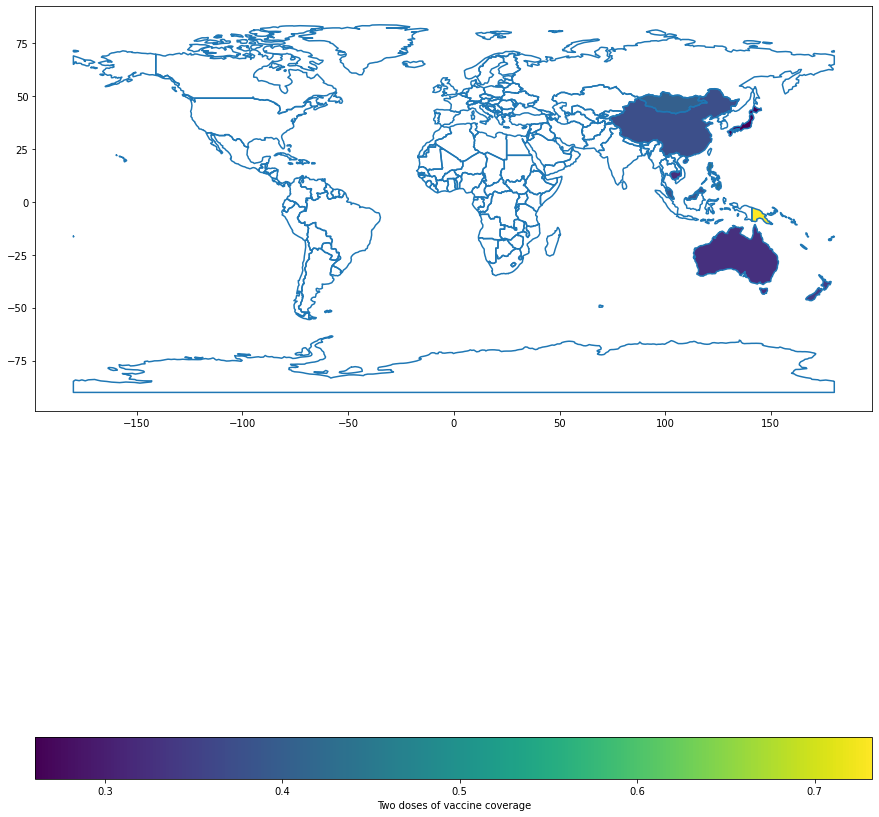

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Geospatial analysis model
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert PySpark DataFrame to Pandas DataFrame
western_pacific_pd = Western_Pacific_data.toPandas()

# Merge the datasets using the 'COUNTRY' column
world = world.merge(western_pacific_pd, left_on='name', right_on='COUNTRY', how='left')

# Check if merge was successful by viewing the columns
print("Columns in the merged world DataFrame:", world.columns)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 40))
world.boundary.plot(ax=ax)

# Ensure the column exists before plotting
if 'Percentage of more than two doses' in world.columns:
    world.plot(column='Percentage of more than two doses', ax=ax, legend=True,
               legend_kwds={'label': "Two doses of vaccine coverage", 'orientation': "horizontal"})
else:
    print("'Percentage of more than two doses' column not found in merged DataFrame.")

plt.show()


<a id="ref2"></a>
### 6.3 Build/Select Model with Algorithm/Model Parameter

First thing to do is start a Spark Session

In [19]:
Western_Pacific_data.columns

['COUNTRY',
 'ISO3',
 'WHO_REGION',
 'DATA_SOURCE',
 'TOTAL_VACCINATIONS',
 'PERSONS_VACCINATED_1PLUS_DOSE',
 'TOTAL_VACCINATIONS_PER100',
 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
 'PERSONS_LAST_DOSE',
 'PERSONS_LAST_DOSE_PER100',
 'FIRST_VACCINE_DATE',
 'NUMBER_VACCINES_TYPES_USED',
 'PERSONS_BOOSTER_ADD_DOSE',
 'PERSONS_BOOSTER_ADD_DOSE_PER100',
 'The prevalence of vaccines',
 'Percentage of more than two doses',
 'WHO Region',
 'Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

In [20]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [21]:
from pyspark.sql.types import IntegerType
dataset = Western_Pacific_data.withColumn("TOTAL_VACCINATIONS", Western_Pacific_data["TOTAL_VACCINATIONS"].cast(IntegerType()))

In [22]:
dataset.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- TOTAL_VACCINATIONS: integer (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)
 |-- Percentage of more than two doses: double (nullable = true)
 |-- WHO Region: string (nullable = true)
 |-- Cases - cumulative total: integer (nullable = true)
 |-- Cases - cumulative total per 10000

In [23]:
from pyspark.sql.functions import when

dataset = dataset.withColumn(
    "Death Rate",
    when(dataset["Cases - cumulative total"] != 0, dataset["Deaths - cumulative total"] / dataset["Cases - cumulative total"]).otherwise(0)
)
dataset.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- WHO_REGION: string (nullable = true)
 |-- DATA_SOURCE: string (nullable = true)
 |-- TOTAL_VACCINATIONS: integer (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE: integer (nullable = true)
 |-- TOTAL_VACCINATIONS_PER100: double (nullable = true)
 |-- PERSONS_VACCINATED_1PLUS_DOSE_PER100: double (nullable = true)
 |-- PERSONS_LAST_DOSE: integer (nullable = true)
 |-- PERSONS_LAST_DOSE_PER100: double (nullable = true)
 |-- FIRST_VACCINE_DATE: string (nullable = true)
 |-- NUMBER_VACCINES_TYPES_USED: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE: integer (nullable = true)
 |-- PERSONS_BOOSTER_ADD_DOSE_PER100: double (nullable = true)
 |-- The prevalence of vaccines: string (nullable = false)
 |-- Percentage of more than two doses: double (nullable = true)
 |-- WHO Region: string (nullable = true)
 |-- Cases - cumulative total: integer (nullable = true)
 |-- Cases - cumulative total per 10000

In [24]:
feat_cols = ['Percentage of more than two doses','Death Rate']

In [25]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')

In [26]:
final_data = vec_assembler.transform(dataset)

In [27]:
from pyspark.ml.feature import StandardScaler

In [28]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [29]:
final_data 

DataFrame[COUNTRY: string, ISO3: string, WHO_REGION: string, DATA_SOURCE: string, TOTAL_VACCINATIONS: int, PERSONS_VACCINATED_1PLUS_DOSE: int, TOTAL_VACCINATIONS_PER100: double, PERSONS_VACCINATED_1PLUS_DOSE_PER100: double, PERSONS_LAST_DOSE: int, PERSONS_LAST_DOSE_PER100: double, FIRST_VACCINE_DATE: string, NUMBER_VACCINES_TYPES_USED: int, PERSONS_BOOSTER_ADD_DOSE: int, PERSONS_BOOSTER_ADD_DOSE_PER100: double, The prevalence of vaccines: string, Percentage of more than two doses: double, WHO Region: string, Cases - cumulative total: int, Cases - cumulative total per 100000 population: double, Cases - newly reported in last 7 days: int, Cases - newly reported in last 7 days per 100000 population: double, Cases - newly reported in last 24 hours: int, Deaths - cumulative total: int, Deaths - cumulative total per 100000 population: double, Deaths - newly reported in last 7 days: int, Deaths - newly reported in last 7 days per 100000 population: double, Deaths - newly reported in last 24 h

In [30]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [31]:
# Normalize each feature to have unit standard deviation.
cluster_final_data = scalerModel.transform(final_data)

## 7. Data Mining
## Train the Model and Evaluate

** Time to find out whether its 2 or 3! **

In [32]:
# Trains a k-means model.
kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)

In [33]:
model3 = kmeans3.fit(cluster_final_data)
model2 = kmeans2.fit(cluster_final_data)

In [34]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [35]:
# Make predictions
predictions3 = model3.transform(cluster_final_data)
predictions2 = model2.transform(cluster_final_data)

In [36]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [37]:
silhouette = evaluator.evaluate(predictions3)
print("With k=3 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions2)
print("With k=2 Silhouette with squared euclidean distance = " + str(silhouette))

With k=3 Silhouette with squared euclidean distance = 0.11990334182121488
With k=2 Silhouette with squared euclidean distance = 0.6736248791343461


In [38]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.

In [39]:
for k in range(2,9):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    predictions = model.transform(cluster_final_data)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("With K={}".format(k))
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print('--'*30)

With K=2
Silhouette with squared euclidean distance = 0.6736248791343461
------------------------------------------------------------
With K=3
Silhouette with squared euclidean distance = 0.11990334182121488
------------------------------------------------------------
With K=4
Silhouette with squared euclidean distance = 0.4160555566390791
------------------------------------------------------------
With K=5
Silhouette with squared euclidean distance = 0.3214735558431818
------------------------------------------------------------
With K=6
Silhouette with squared euclidean distance = 0.20706994632312994
------------------------------------------------------------
With K=7
Silhouette with squared euclidean distance = -0.07705150403721597
------------------------------------------------------------
With K=8
Silhouette with squared euclidean distance = 0.22383874553124108
------------------------------------------------------------


**Let's check with the transform and prediction columns that result form this! Congratulations if you made this connection, it was quite tricky given what we've covered!**

In [41]:
model3.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    3|
|         3|    1|
|         4|   15|
|         2|    1|
|         0|   15|
+----------+-----+



In [42]:
model2.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    3|
|         3|    1|
|         4|   15|
|         2|    1|
|         0|   15|
+----------+-----+



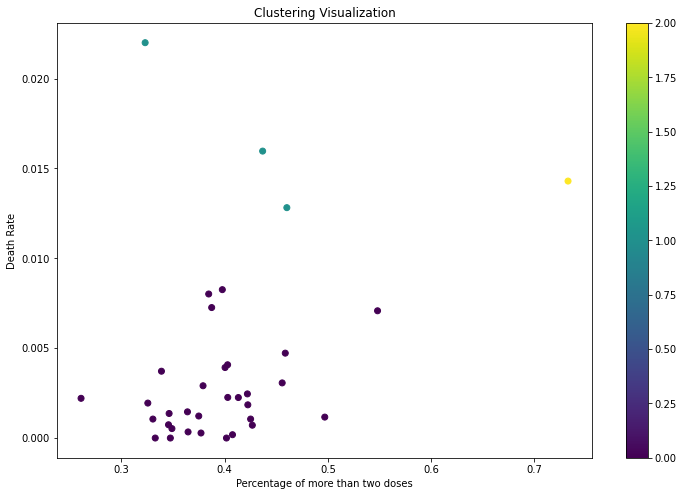

In [45]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = predictions3.select("Percentage of more than two doses", "Death Rate", "prediction").toPandas()

# Visualize the clusters using matplotlib
plt.figure(figsize=(12,8))
plt.scatter(pandas_df['Percentage of more than two doses'], pandas_df['Death Rate'], c=pandas_df['prediction'], cmap='viridis')
plt.xlabel('Percentage of more than two doses')
plt.ylabel('Death Rate')
plt.title('Clustering Visualization')
plt.colorbar()
plt.show()


#### 8.5 Adjust the Model

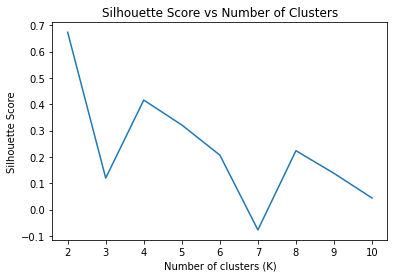

Best K value: 2


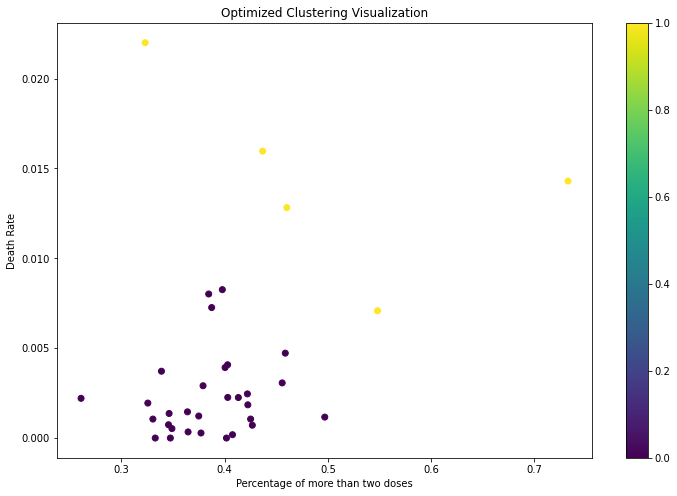

In [50]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is loaded in a DataFrame called 'data'

# 1. Feature Engineering
assembler = VectorAssembler(
    inputCols=["Percentage of more than two doses", "Death Rate"],
    outputCol="features")
output = assembler.transform(dataset)

# Feature Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(output)
scaledData = scalerModel.transform(output)

# 2. Model Training without CrossValidator
k_values = list(range(2, 11))
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(featuresCol='scaledFeatures', k=k)
    model = kmeans.fit(scaledData)
    predictions = model.transform(scaledData)
    evaluator = ClusteringEvaluator()
    
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the best K based on the plot
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K value: {best_k}")

# Train KMeans with the best K value
best_kmeans = KMeans(featuresCol='scaledFeatures', k=best_k)
best_model = best_kmeans.fit(scaledData)
predictions = best_model.transform(scaledData)

# 3. Visualization
pandas_df = predictions.select("Percentage of more than two doses", "Death Rate", "prediction").toPandas()

plt.figure(figsize=(12,8))
plt.scatter(pandas_df['Percentage of more than two doses'], pandas_df['Death Rate'], c=pandas_df['prediction'], cmap='viridis')
plt.xlabel('Percentage of more than two doses')
plt.ylabel('Death Rate')
plt.title('Optimized Clustering Visualization')
plt.colorbar()
plt.show()
